# Tutorial 1: Built in demonstration scripts 

In [1]:
# import dlim packages 
from dlim.model import DLIM 
from dlim.dataset import Data_model
from dlim.api import DLIM_API


import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from numpy.random import choice

## Load data and split the data into training and validation 

### Load data, data needs to be a csv file
- the first n-1 columns n-1 genes or different variable, in each genes, there will be multiple mutations
- the last column is fitness value

In [2]:
df_data = pd.read_csv("../data/data_env_1.csv", sep = ',', header = None)


### Load data into tensor format and feed to DLIM later on 
### Manually split data into 70% for training and 30% for testing 

In [3]:
data = Data_model(data=df_data, n_variables=2)
train_id = choice(range(data.data.shape[0]), int(data.data.shape[0]*0.7), replace=False)
val_id = [i for i in range(data.data.shape[0]) if i not in train_id]
train_data = data.subset(train_id)
val_data = data.subset(val_id)

## Construct your model and train your data 
**DLIM model**:
- n_variables: the number of variables (e.g., genes, environments)
- hid_dim: the number of neurons in hidden layers
- nb_layer: the number of hidden layers of your NN  

**DLIM_API**:

this is the api to train, predict and plot the final landscape obtained

- model: DLIM model
- flag_spectral: bool, True if use spectral initialization; False, use Xavier-Glorot initialization 
- dlim_regressor.fit: train the model with training data


**Hyperparameters**

- lr: learning rate
- nb_epoch: number of epoches 
- batch_size: size of batch
- emb_regularization: weight on regularization on embeddings 
- save_path: path for saveing model, if None, the model won't be saved 

In [14]:
model = DLIM(n_variables = train_data.nb_val, hid_dim = 32, nb_layer = 0)
dlim_regressor = DLIM_API(model=model, flag_spectral=True)
save_path= './pretrain/harry_env_model.pt'
losses = dlim_regressor.fit(train_data, lr = 1e-3, nb_epoch=400, batch_size=32, emb_regularization=1e-2, save_path=save_path)

spectral gap = 0.9138598442077637
spectral gap = 0.8936509490013123
Model saved to ./pretrain/harry_env_model.pt


## Show the learning loss during training 

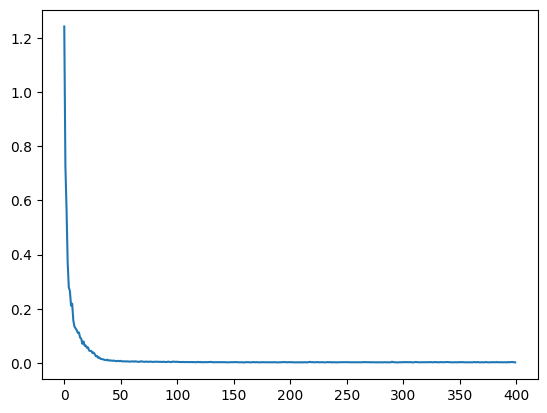

In [15]:
plt.figure 
plt.plot(losses)
plt.show()

## Prediction on validation data 

**dlim_regressor.predict**

- data should be tensor 
- detach: bool, True to get numpy array type output; False, get tensor type output

In [16]:
fit_a, var_a, lat_a = dlim_regressor.predict(val_data.data[:,:-1], detach=True) 

## Visualization on landscape 
- first panel: landscape by DLIM and dots are measurements 
- second panel: the infered phenotype of each mutations on gene 1 versus all fitness mesured on this mutation
- third panel: the infered phenotype of each mutations on gene 2 versus all fitness mesured on this mutation

0.9692240930157855
PearsonRResult(statistic=np.float64(0.30154426352808916), pvalue=np.float64(6.140662304526186e-10))


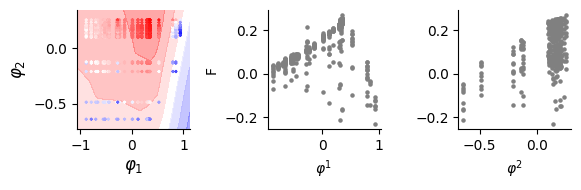

In [17]:
score = pearsonr(fit_a.flatten(), val_data.data[:, [-1]].flatten())[0]
print(score)

fig, (bx, cx, dx) = plt.subplots(1, 3, figsize=(6, 2))
dlim_regressor.plot(bx, data)

for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

# Plot the a00verage curve
print(pearsonr(lat_a[:, 0], val_data[:, -1]))
cx.scatter(lat_a[:, 0], val_data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], val_data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
cx.set_xlabel("$\\varphi^1$")
dx.set_xlabel("$\\varphi^2$")
plt.tight_layout()
plt.show()

## Use pretrained model 

**DLIM model**:
- n_variables: the number of variables (e.g., genes, environments)
- hid_dim: the number of neurons in hidden layers
- nb_layer: the number of hidden layers of your NN  

**DLIM_API**:

if the model is already saved, you can load the model by add 

- load_model: the path of the saved model 
- flag_spectral: bool, True if use spectral initialization; False, use Xavier-Glorot initialization 
- dlim_regressor.predict: use saved model to predict data 

In [18]:
model = DLIM(n_variables = data.nb_val, hid_dim = 32, nb_layer = 0)
dlim_regressor = DLIM_API(model=model, flag_spectral=True, load_model='./pretrain/harry_env_model.pt')
fit_a, var_a, lat_a = dlim_regressor.predict(data.data[:,:-1], detach=True) 

## Visualization of obtained landscape 

0.9720600110854685
PearsonRResult(statistic=np.float64(0.2841720504655693), pvalue=np.float64(2.114151270231121e-26))


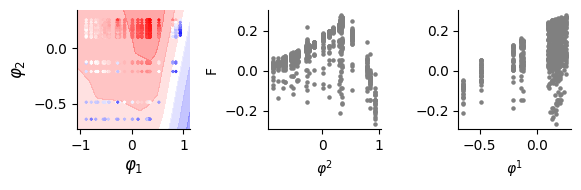

In [19]:
score = pearsonr(fit_a.flatten(), data.data[:, [-1]].flatten())[0]
print(score)

fig, (bx, cx, dx) = plt.subplots(1, 3, figsize=(6, 2))
dlim_regressor.plot(bx, data)

for xx in [bx, cx, dx]:
    for el in ["top", "right"]:
        xx.spines[el].set_visible(False)

# Plot the a00verage curve
print(pearsonr(lat_a[:, 0], data[:, -1]))
cx.scatter(lat_a[:, 0], data[:, -1], s=5, c="grey")
dx.scatter(lat_a[:, 1], data[:, -1], s=5, c="grey")
cx.set_ylabel("F")
dx.set_xlabel("$\\varphi^1$")
cx.set_xlabel("$\\varphi^2$")
plt.tight_layout()
plt.show()